In [6]:
%autosave 0

Autosave disabled


<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 14px; 
            font-weight: 500;
            padding: 30px 5px 30px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>(Custom CSS files are not reliable for controlling Jupyter font style. To establish the same appearance as the original notebook, depend on the browser to control the font, by setting the desired font faces in the browser settings. For example, Chrome 135 or Firefox 134 can do this. In this notebook series, Bookerly font is for markdown and Monaco is for code.)
     
     
     

</font>                 
</div>

<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 20px 5px 20px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>**Chapter 31-10 Solving PDEs with the PseudoSpectral Method**.
 
What is the distinction implied between the terms 'pseudo-spectral' and 'spectral' methods? According to Wikipeida: Pseudo-spectral methods, also known as discrete variable representation (DVR) methods, are a class of numerical methods used in applied mathematics and scientific computing for the solution of partial differential equations. They are closely related to spectral methods, but complement the basis by an additional pseudo-spectral basis, which allows representation of functions on a quadrature grid. This simplifies the evaluation of certain operators, and can considerably speed up the calculation when using fast algorithms such as the fast Fourier transform. 


Spectral methods are a class of techniques used in applied mathematics and scientific computing to numerically solve certain differential equations. The idea is to write the solution of the differential equation as a sum of certain "basis functions" (for example, as a Fourier series which is a sum of sinusoids) and then to choose the coefficients in the sum in order to satisfy the differential equation as well as possible.

Spectral methods and finite element methods are closely related and built on the same ideas; the main difference between them is that spectral methods use basis functions that are generally nonzero over the whole domain, while finite element methods use basis functions that are nonzero only on small subdomains (compact support). Consequently, spectral methods connect variables globally while finite elements do so locally. Partially for this reason, spectral methods have excellent error properties, with the so-called "exponential convergence" being the fastest possible, when the solution is smooth. However, there are no known three-dimensional single domain spectral shock capturing results (shock waves are not smooth). In the finite element community, a method where the degree of the elements is very high or increases as the grid parameter 'h' increases is sometimes called a spectral element method.

Spectral methods can be used to solve differential equations (PDEs, ODEs, eigenvalue, etc) and optimization problems. When applying spectral methods to time-dependent PDEs, the solution is typically written as a sum of basis functions with time-dependent coefficients; substituting this in the PDE yields a system of ODEs in the coefficients which can be solved using any numerical method for ODEs. Eigenvalue problems for ODEs are similarly converted to matrix eigenvalue problems.

Spectral methods can be computationally less expensive and easier to implement than finite element methods; they shine best when high accuracy is sought in simple domains with smooth solutions. However, because of their global nature, the matrices associated with step computation are dense and computational efficiency will quickly suffer when there are many degrees of freedom (with some exceptions, for example if matrix applications can be written as Fourier transforms). For larger problems and nonsmooth solutions, finite elements will generally work better due to sparse matrices and better modelling of discontinuities and sharp bends. 

     
     
     

</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The example below shows how the Korteweg-de Vries equation can be solved on a periodic domain using the method of lines, with the spatial derivatives computed using the pseudo-spectral method. In this method, the derivatives are computed in the frequency domain by first applying the FFT to the data, then multiplying by the appropriate values and converting back to the spatial domain with the inverse FFT. This method of differentiation is implemented by the $\textit{diff}$ function in the module scipy.fftpack.

The spatial domain is discretized, and the spatial derivatives are computed using the $\textit{diff}$ function defined in the scipy.fftpack module. (In the following code, this function is given the alias $\textit{psdiff}$ to avoid confusing it with the numpy function $\textit{diff}$.) Discretizing only the spatial dimension, yields a system of ordinary differential equations, which is implemented in the function kdv(u, t, L). The function kdv_solution(u0, t, L) uses scipy.integrate.odeint to solve this system.

     
     
     

</font>                 
</div>

Computing the solution.
Plotting.


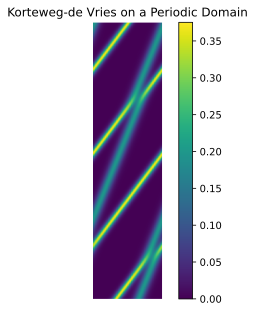

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
%config InlineBackend.figure_formats = ['svg']


def kdv_exact(x, c):
    """Profile of the exact solution to the KdV for a single soliton on the real line."""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Differential equations for the KdV equation, discretized in x."""
    # Compute the x derivatives using the pseudo-spectral method.
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Compute du/dt.    
    dudt = -6*u*ux - uxxx

    return dudt

def kdv_solution(u0, t, L):
    """Use odeint to solve the KdV equation on a periodic domain.
    
    `u0` is initial condition, `t` is the array of time values at which
    the solution is to be computed, and `L` is the length of the periodic
    domain."""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol


if __name__ == "__main__":
    # Set the size of the domain, and create the discretized grid.
    L = 50.0
    N = 64
    dx = L / (N - 1.0)
    x = np.linspace(0, (1-1.0/N)*L, N)

    # Set the initial conditions.
    # Not exact for two solitons on a periodic domain, but close enough...
    u0 = kdv_exact(x-0.33*L, 0.75) + kdv_exact(x-0.65*L, 0.4)

    # Set the time sample grid.
    T = 200
    t = np.linspace(0, T, 501)

    print("Computing the solution.")
    sol = kdv_solution(u0, t, L)


    print("Plotting.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('off')
    plt.title('Korteweg-de Vries on a Periodic Domain')
    plt.show()
    
    

<img src="korteweg.svg" />

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>At the current time allowed for rendering Jupyter notebooks by Github, one of the plots from above is not printed.  It can be seen in the .pdf version of the notebook.

</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>An influential book about the spectral method is *Spectral Methods in Matlab* by L. Trefethen. This book contains about thirty numbered m-files, representing a progressive introduction to spectral operations on PDEs. One of the pivotal files,itself unnumbered, is **cheb.m**, the reference file for the bulk of operations dealing with spectral techniques. (Spectral manipulations deal with power series solutions of Cheybyshev polynomials.) The file **cheb.m**, like the rest, can be easily tweaked to run in Octave. However, Octave fails to perform a critical task in the calculation process. For example, when file **p11.m** is run, the   $\hspace{0.5 mm}$message in the command window is the following:

*error: conversion of 8.9 to octave_idx_type value failed<br>
error: called from<br>
    cheb at line 5 column 3<br>
    p11 at line 4 column 10*<br>
    
This bug in Octave has been duly documented, but in spite of the passage of a couple of years, it still exists. As it is unable to process any files which depend on the **cheb.m** file, Octave is seemingly at a loss to perform. However, there are additional resources. In Github are several repositories incorporating the term "chebpy", which have as their common purpose the adaptation of Cheybyshev manipulations in Matlab to the Python language. One in particular, cpraveen/chebpy, has insightful translations of all Trafethen's files, in both Python as well as Matlab format. When using these translated versions, Octave can faithfully reproduce the calculations and plots of the original book.


</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Note that the chebPy from the cpraveen repository is not the same chebpy as the one hosted on Pypi. CPraveen's chebPy does not have an install routine. Jupyter implacably ignores attempts so far to import chebPy as a module; therefore it has been necessary to include the whole python file, below.

</font>                 
</div>

In [10]:
from numpy import pi,cos,arange,ones,tile,dot,eye,diag

def cheb(N):
    '''Chebushev polynomial differentiation matrix.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    x      = cos(pi*arange(0,N+1)/N)
    if N%2 == 0:
        x[N//2] = 0.0 # only when N is even!
    c      = ones(N+1); c[0] = 2.0; c[N] = 2.0
    c      = c * (-1.0)**arange(0,N+1)
    c      = c.reshape(N+1,1)
    X      = tile(x.reshape(N+1,1), (1,N+1))
    dX     = X - X.T
    D      = dot(c, 1.0/c.T) / (dX+eye(N+1))
    D      = D - diag( D.sum(axis=1) )
    return D,x



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The plot below shows the Python version of Trefethen's p11.m.  

</font>                 
</div>

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import linspace,exp,sin,dot
from matplotlib.pyplot import figure,subplot,plot,title
#from chebPy import *



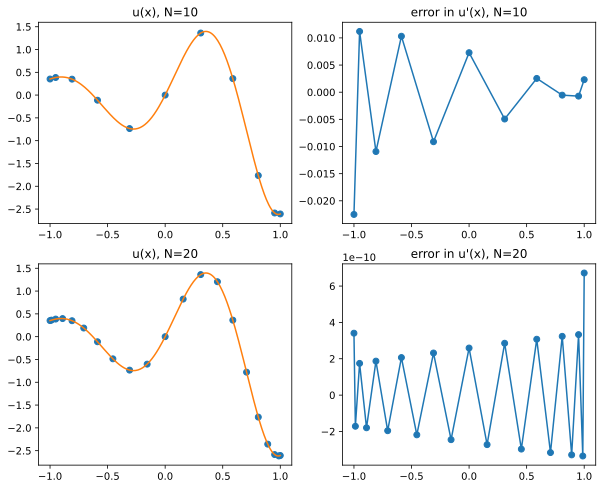

In [12]:
xx = linspace(-1.0,1.0,200,True)
uu = exp(xx)*sin(5.0*xx)
c = 1; figure(figsize=(10,8))
for N in [10,20]:
    D,x = cheb(N); u = exp(x)*sin(5.0*x)
    subplot(2,2,c); c += 1
    plot(x,u,'o',xx,uu)
    title('u(x), N='+str(N))
    
    error = dot(D,u) - exp(x)*(sin(5.0*x)+5.0*cos(5.0*x))
    subplot(2,2,c); c += 1
    plot(x,error,'o-')
    title('error in u\'(x), N='+str(N))
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The cell below shows the Matlab version of the Trefethen files for p11 in operation. The Matlab code is also authored by CPraveen and available on the Github website.
</font>                 
</div>

In [ ]:
% p11.m - Chebyshev differentation of a smooth function

  xx = -1:.01:1; uu = exp(xx).*sin(5*xx); clf
  for N = [10 20]
    [D,x] = cheb(N); u = exp(x).*sin(5*x);
      subplot('position',[.15 .66-.4*(N==20) .31 .28])
      plot(x,u,'.','markersize',5), grid on
      line(xx,uu)
      title(['u(x),  N=' int2str(N)])
    error = D*u - exp(x).*(sin(5*x)+5*cos(5*x));
      subplot('position',[.55 .66-.4*(N==20) .31 .28])
      plot(x,error,'.','markersize',5), grid on
      line(x,error)
      title(['  error in u''(x),  N=' int2str(N)])
  end



<img src="image01.svg" />

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Trefethen's p17 looks interesting and is shown below.
</font>                 
</div>

In [14]:
#import sys
#sys.path.insert(0, "../chebPy")
%matplotlib inline
%config InlineBackend.figure_format='svg'
#from chebPy import *
from numpy import meshgrid,sin,dot,eye,kron,zeros,reshape,exp,linspace
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel,contour
from matplotlib import cm
from scipy.linalg import solve
from scipy.interpolate import interp2d



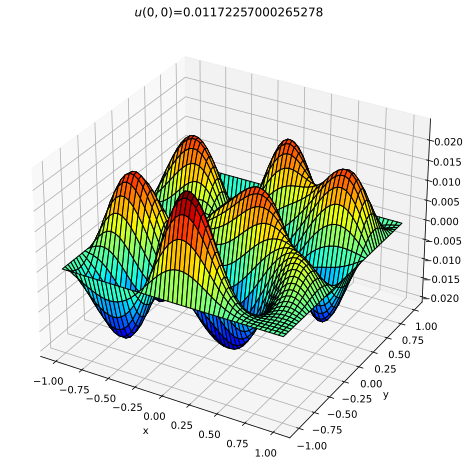

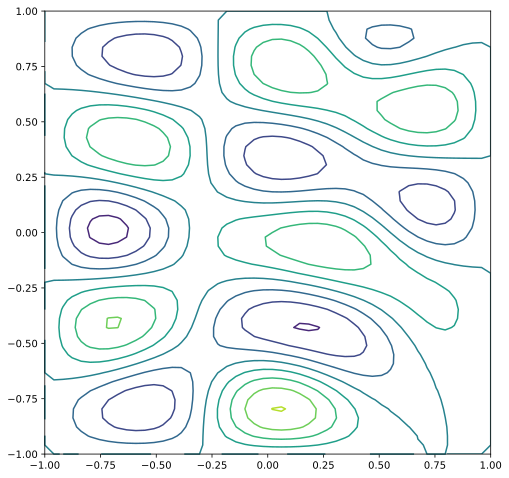

In [15]:
N = 24; D,x = cheb(N); y = x;
xx,yy = meshgrid(x[1:N],y[1:N])
xx = reshape(xx,(N-1)**2)
yy = reshape(yy,(N-1)**2)
f = exp(-10*((yy-1)**2 + (xx - 0.5)**2 ))
D2 = dot(D,D); D2 = D2[1:N,1:N]; I = eye(N-1)
k = 9
L = kron(I,D2) + kron(D2,I) + k**2*eye((N-1)**2)
# Solve Lu=f
u = solve(L,f)
# Convert 1-d vectors to 2-d
uu = zeros((N+1,N+1)); uu[1:N,1:N] = reshape(u,(N-1,N-1))
[xx,yy] = meshgrid(x,y)
value = uu[N//2,N//2]

f = interp2d(x,y,uu,kind='cubic')
xxx = linspace(-1.0,1.0,50)
uuu = f(xxx,xxx)

fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
[X ,Y] = meshgrid(xxx,xxx)
ax.plot_surface(X,Y,uuu,rstride=1,cstride=1,cmap=cm.jet,edgecolor='black')
title("$u(0,0)$="+str(value))
xlabel("x"); ylabel("y");

figure(figsize = (8,8))
contour(X,Y,uuu);




































